In [ ]:
import pandas as pd

df = pd.read_json('C:/Users/likit/OneDrive/Desktop/DataMiningAssignment/Data/data.json')
df.to_csv('C:/Users/likit/OneDrive/Desktop/DataMiningAssignment/Data/RestaurantData.csv')

In [ ]:
data = pd.read_csv('C:/Users/likit/OneDrive/Desktop/DataMiningAssignment/Data/swiggy.csv')

In [ ]:
data.shape

(148541, 11)

In [ ]:
data.info() 

In [ ]:
data.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [ ]:
#Checking the percentage of missing values in each column
round(100*(data.isnull().sum()/len(data.index)), 2) 


id              0.00
name            0.06
city            0.00
rating          0.06
rating_count    0.06
cost            0.09
cuisine         0.07
lic_no          0.15
link            0.00
address         0.06
menu            0.00
dtype: float64

In [ ]:
# 0.6 or 0.9 are very minute, so we remove them  
data.dropna(subset=['name','rating','rating_count','cost','cuisine','address'],how='any')  

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [ ]:
#Filling the null values in the lic_no with Mode based on each licence number
m=data['lic_no'].mode()
data.fillna(m)   

#Filtering the null rows from null valued columns
data = data[-data["name"].isnull()]
data = data[-data["rating"].isnull()]
data = data[-data["rating_count"].isnull()]
data = data[-data["cost"].isnull()]
data = data[-data["cuisine"].isnull()]
data = data[-data["address"].isnull()]
data = data[-data["lic_no"].isnull()]

round(100*(data.isnull().sum()/len(data.index)), 2) 

id              0.0
name            0.0
city            0.0
rating          0.0
rating_count    0.0
cost            0.0
cuisine         0.0
lic_no          0.0
link            0.0
address         0.0
menu            0.0
dtype: float64

In [ ]:
#Calculating the data loss
100-round(100*len(data.index)/148541,2) 
#We lost 0.1% data in the data cleaning process

0.18999999999999773

In [ ]:
#Check for duplicated column
data.duplicated().sum() 

0

In [ ]:
#Check for appropriate datatype
# # for rating column 
# replace '--' with 0 and typecasted to float 

def fun(column):
    rating_int = []
    for i in column:
        if i=='--':
            rating_int.append(0)
        else:
            rating_int.append(float(i)) 
    return rating_int 

data['rating'] = fun(data['rating'])
data['rating'].replace(0.0,round(data['rating'].mean(),2), inplace=True)   

In [ ]:
data['rating_count'].value_counts() 

Too Few Ratings    86912
20+ ratings        21604
100+ ratings       20514
50+ ratings        11985
500+ ratings        4390
1K+ ratings         2737
5K+ ratings           98
10K+ ratings          15
Name: rating_count, dtype: int64

In [ ]:
# for rating counts 
# convert Too Few Ratings to 1 and whole typecasted to float 

def fun(n):
    try:
        num = n.split(" ")[0]
        if num.split('+')[0].isdigit():
            return float(num.split('+')[0]) 
        else:
            return 1 
    except:
        return n 

data['rating_count']=data['rating_count'].apply(fun)  

In [ ]:
# for cost column 
# just remove the ₹ sign and convert to float 
def fun(a):
    try:
        return float(a.split('₹')[1]) 
    except:
        return 0 

data['cost'] = data['cost'].apply(fun)   
#Data Cleaning is completed now

In [ ]:
#Exploratory data Analysis

In [ ]:
data.describe() 

,id,rating,rating_count,cost
count,148255.000000,148255.000000,148255.000000,148255.0
mean,363737.807649,2.555256,36.204459,0.0
std,167787.159149,1.163415,87.958896,0.0
min,211.000000,1.000000,1.000000,0.0
25%,234022.500000,1.610000,1.000000,0.0
50%,412935.000000,1.610000,1.000000,0.0
75%,502339.500000,3.800000,20.000000,0.0
max,581031.000000,5.000000,500.000000,0.0


In [ ]:
# 1. Restaurant with Maximum Rating in Yavatmal
data1 = data[data['city']=='Yavatmal']
max_rating_in_city = data1.groupby('name')['rating'].max().sort_values(ascending=False).head(5) 
max_rating_in_city 

name
Ranade Bandhu                                      4.7
Kwality Walls Frozen Dessert and Ice Cream Shop    4.5
Bliss the fusion resto                             4.2
Domino's Pizza                                     4.2
Chaitanya Bhojnalay                                4.0
Name: rating, dtype: float64

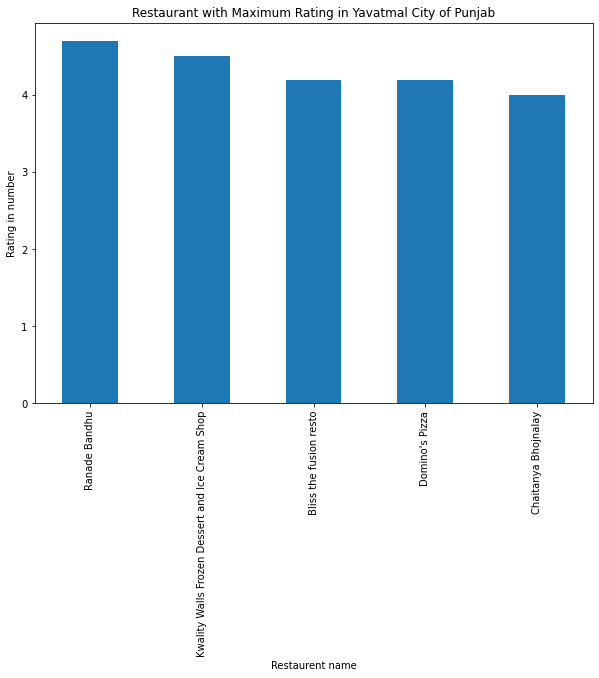

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
max_rating_in_city.plot.bar()
plt.ylabel("Rating in number")
plt.xlabel("Restaurent name")
plt.title("Restaurant with Maximum Rating in Yavatmal City of Punjab") 
plt.show()

In [ ]:
# 2. Number of cities (including subregions) where swiggy is having their restaurants listed? 
len(data.groupby('city'))  

821

In [ ]:
# 3. Number of cities (don't include subregions) where swiggy is having their restaurants listed? 
data['city'].apply(lambda x: x.split(",")[-1]).nunique()

552

In [ ]:
# 4. The city with the maximum number of restaurants listed on Swiggy? 
data.groupby('city').size().sort_values(ascending=False).reset_index().iloc[0,0]    

'Bikaner'

In [ ]:
# 5. Restaurant chain with maximum number of branches? 
data['name'].value_counts().sort_values(ascending=False).index[0] 

"Domino's Pizza"

In [ ]:
# 6. Top 10 cities as per the number of restaurants listed?  
top_10_cities = data.groupby('city')['name'].count().sort_values(ascending=False).head(10)
top_10_cities 

city
Bikaner                      1665
Noida-1                      1424
Indirapuram,Delhi            1279
BTM,Bangalore                1159
Rohini,Delhi                 1135
Kothrud,Pune                 1086
Indiranagar,Bangalore        1079
Electronic City,Bangalore    1039
Greater Kailash 2,Delhi      1037
Vashi,Mumbai                 1021
Name: name, dtype: int64

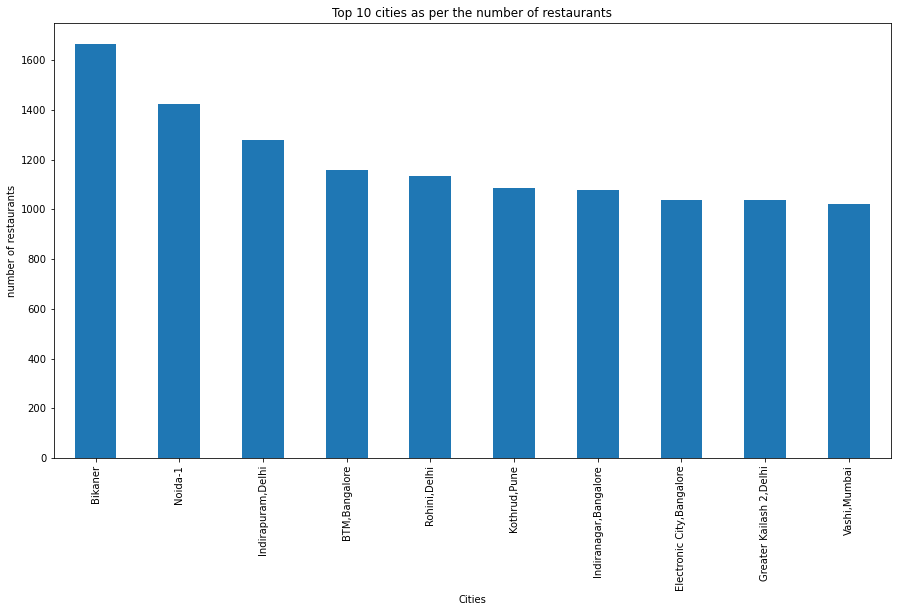

In [ ]:
plt.figure(figsize=(15, 8))
top_10_cities.plot.bar()
plt.ylabel("number of restaurants")
plt.xlabel("Cities")
plt.title("Top 10 cities as per the number of restaurants") 
plt.show() 

In [ ]:
# 8. Which city is having the least expensive restaurant in terms of cost?
data.groupby('city')['cost'].mean().sort_values().index[0]  

'Abids & Koti,Hyderabad'

In [ ]:
# 9. Top 5 most popular restaurant chains in India? 
Top_5_most_popular_restaurant_chains = data.groupby('name')['rating'].mean().sort_values(ascending=False).head(5)  
Top_5_most_popular_restaurant_chains 

name
DESI REPUBLIC              5.0
Just Dig In                5.0
Kurries & krolls           5.0
SHREE SAMARTHA CHAPATIS    5.0
OLIVE PIZZERIA             5.0
Name: rating, dtype: float64

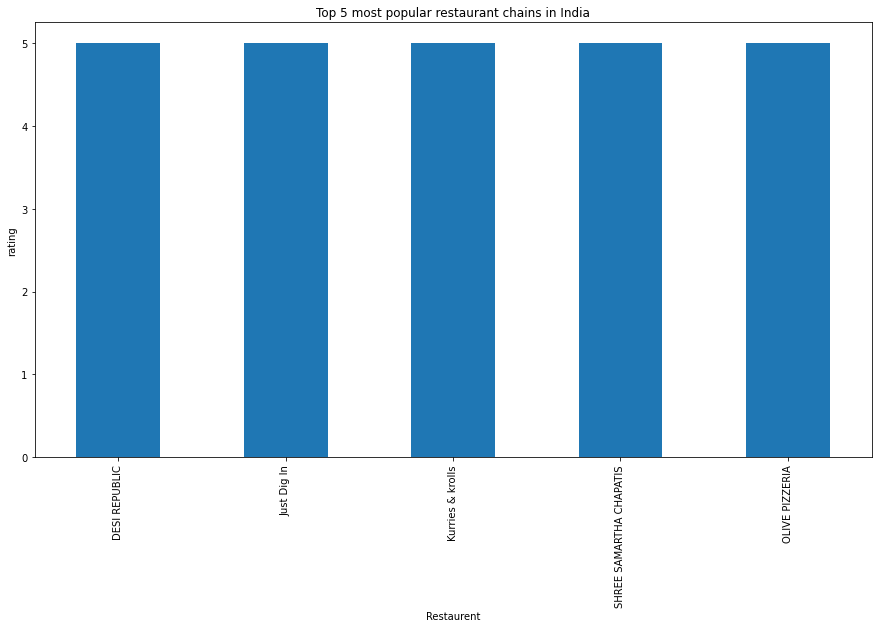

In [ ]:
plt.figure(figsize=(15, 8))
Top_5_most_popular_restaurant_chains.plot.bar()
plt.ylabel("rating")
plt.xlabel("Restaurent")
plt.title("Top 5 most popular restaurant chains in India") 
plt.show() 

In [ ]:
# 10. Which restaurant in Banglore has the most number of people visited(take a number of reviews for reference)? 
data2 = data[data['city'].str.contains('Bangalore')]
data2 = data[data['city'].str.contains('Bangalore')]
data2.groupby('name')['rating_count'].sum().sort_values(ascending=False).index[0] 

"Domino's Pizza"